<h1><span style="background-color:blue; color:white; padding: 5px;">Entrainment de modèles avec RandomForest Regressor<br></h1>
</h4><span style="background-color:red; color:white; padding: 5px;">Utiliser un outil permettant de rafraîchir la page régulièrement pour éviter la mise en sommeil de MLflow sur Heroku
</span></h4>

In [1]:
import pandas as pd
from functions2 import *

<h2><span style="background-color:grey; color:white; padding: 5px;">Entraînement sur toutes les ventes</span></h2>

In [2]:
for type_de_bien in ["Appartement","Maison"]:
    # Chargement des données
    query=f"""
    SELECT 
        V.SURFACE_BATI,
        V.DEPENDANCES,
        V.ID_COMMUNE,
        R.Name_region,
        {'V.SURFACE_TERRAIN,' if type_de_bien=="Maison" else ''}
        V.DATE_MUTATION,
        V.MONTANT
    FROM VENTES V
    INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
    INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
    INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
    INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION
    WHERE V.MONTANT>15000
    AND V.MONTANT<6500000
    AND T.NAME_TYPE_BIEN='{type_de_bien}'
    AND V.SURFACE_BATI>0
    AND V.NB_PIECES>0
    # AND V.DATE_MUTATION >= DATE_SUB((SELECT MAX(DATE_MUTATION) FROM VENTES), INTERVAL 15 MONTH)
    AND R.Name_region NOT IN("Martinique", "Guyane", "La Réunion", "Mayotte", "Guadeloupe");
    """

    df = loading_data(query)
    print(f"Les données s'étendent du {df['DATE_MUTATION'].min()} au {df['DATE_MUTATION'].max()}")
    print(f"Il y a {df.shape[0]} ventes sur cette durée.")

    # Split des données
    X_train,y_train, X_test, y_test = split(df)

    # Labellisation et standardisation
    X_train,X_test,encoders,scalers =  encod_scal(X_train,X_test)

    # Entraînement du modèle
    param_grid = {
        'n_estimators': [50],
        'max_depth': [10],
        'min_samples_split': [2]
    }   
    cv=5
    model, best_params = train_model_randomforest(X_train,y_train, param_grid, cv)

    # Affichage et enregistrement de la learning curve
    image_path = plot_learning_curve(RandomForestRegressor(**best_params), run_name, X_train, y_train)

    # Sauvegarde avec MLflow
    uri_tracking = "https://mlflowimmoappkevleg-737621d410d0.herokuapp.com/"
    experiment_name = "RandomForestRegressor_all_datas_region_time"
    run_name = type_de_bien
    model_name = f"RFR_all_datas_{type_de_bien}"
    log_mlflow(uri_tracking,
           experiment_name, run_name,
            best_params,
            model, model_name,
            X_test, y_test,
            encoders,scalers,
            image_path)

<h2><span style="background-color:grey; color:white; padding: 5px;">Entraînement sur 12 mois et test sur les 3derniers mois</span></h2>

Chargement des données en cours...
Création engine sqlalchemy OK
Chargement des données ok
Les données s'étendent du 2021-09-30 00:00:00 au 2022-12-31 00:00:00
Il y a 711111 ventes sur cette durée.
Voici un aperçue des données :
Split des données en cours...
Split OK
Normalisation des données en cours...
Normalisation des données OK
Entraînement en cours ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 3.7min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 3.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 3.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 4.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 3.6min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 6.2min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 6.0min
[CV

2024/02/13 16:01:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Ré-entraînement avec les meilleurs hyperparamètres en cours...


2024/02/13 16:08:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Entraînement OK
Tracé du graphique en cours...


2024/02/13 16:09:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°1 : train score = 0.878423981779919 -- validation score = 0.534494314077161


2024/02/13 16:11:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°2 : train score = 0.8839642189195666 -- validation score = 0.6026015929432618


2024/02/13 16:14:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°3 : train score = 0.8856733058532766 -- validation score = 0.6470862183594086


2024/02/13 16:17:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°4 : train score = 0.8888514396428573 -- validation score = 0.6956645595529848


2024/02/13 16:21:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°5 : train score = 0.8934450884424789 -- validation score = 0.7339583309226024


2024/02/13 16:26:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°6 : train score = 0.8928641731809693 -- validation score = 0.7704354347576545


2024/02/13 16:31:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°7 : train score = 0.8951451950358567 -- validation score = 0.8051315172740954


2024/02/13 16:40:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°8 : train score = 0.8961255221163391 -- validation score = 0.8350425723194465


2024/02/13 16:49:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°9 : train score = 0.8976186688638637 -- validation score = 0.8664920340139676


2024/02/13 16:58:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 0 must be in the 'active' state. Current state is deleted.


Itération N°10 : train score = 0.898351999314661 -- validation score = 0.8952542440119237


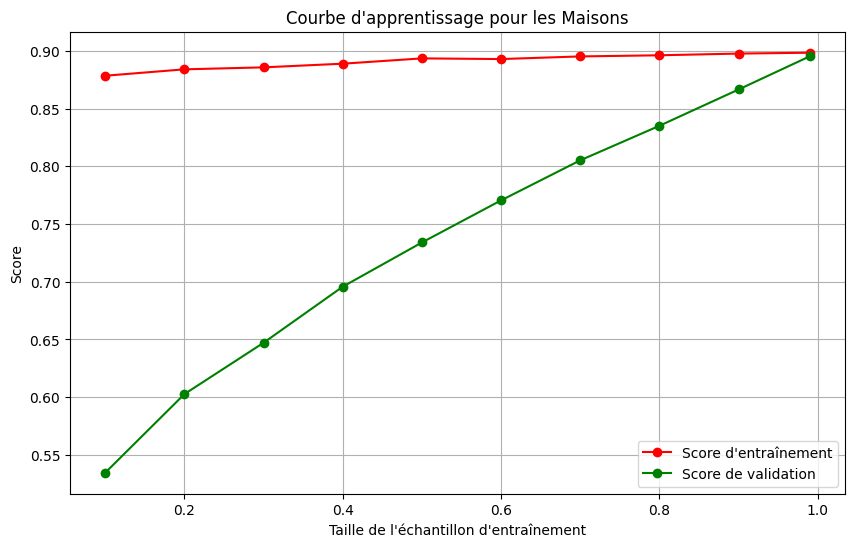

Tracé OK
Log du modèle et des artifacts en cours...


MlflowException: API request to https://mlflowimmoappkevleg-737621d410d0.herokuapp.com/api/2.0/mlflow-artifacts/artifacts/6/a2df7dd220044f1a904445f0c63f69fa/artifacts/ImmoApp/model.pkl failed with exception HTTPSConnectionPool(host='mlflowimmoappkevleg-737621d410d0.herokuapp.com', port=443): Max retries exceeded with url: /api/2.0/mlflow-artifacts/artifacts/6/a2df7dd220044f1a904445f0c63f69fa/artifacts/ImmoApp/model.pkl (Caused by ResponseError('too many 503 error responses'))

In [13]:
# Configuration du modèle
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
    }   
cv=5

# Configuration de mlflow
uri_tracking = "https://mlflowimmoappkevleg-737621d410d0.herokuapp.com/"
experiment_name = "RandomForestRegressor_15months_all_datas_region"

for type_de_bien in ["Appartement","Maison"] :

    run_name = type_de_bien
    model_name = f"RFR_all_datas_{type_de_bien}"
    
    query=f"""
    SELECT 
        V.SURFACE_BATI,
        V.DEPENDANCES,
        V.ID_COMMUNE,
        R.Name_region,
        {'V.SURFACE_TERRAIN,' if type_de_bien=="Maison" else ''}
        V.DATE_MUTATION,
        V.MONTANT
    FROM VENTES V
    INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
    INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
    INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
    INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION
    WHERE V.MONTANT>15000  AND V.MONTANT<6500000
    AND T.NAME_TYPE_BIEN='{type_de_bien}'
    AND V.SURFACE_BATI>0
    AND V.NB_PIECES>0
    AND V.DATE_MUTATION >= DATE_SUB((SELECT MAX(DATE_MUTATION) FROM VENTES), INTERVAL 15 MONTH)
    AND R.Name_region NOT IN("Martinique", "Guyane", "La Réunion", "Mayotte", "Guadeloupe");
    """

    df = loading_data(query)
    print(f"Les données s'étendent du {df['DATE_MUTATION'].min()} au {df['DATE_MUTATION'].max()}")
    print(f"Il y a {df.shape[0]} ventes sur cette durée.")
    print("Voici un aperçue des données :")
    
    X_train,y_train, X_test, y_test = split(df)

    X_train,X_test,encoders,scalers =  encod_scal(X_train,X_test)

    model, best_params = train_model_randomforest(X_train,y_train, param_grid, cv)

    # Tracé et enregistrement de la learning curve
    image_path = plot_learning_curve(RandomForestRegressor(**best_params), run_name, X_train, y_train)
    
    log_mlflow(uri_tracking,
           experiment_name, run_name,
            best_params,
            model, model_name,
            X_test, y_test,
            encoders,scalers,
            image_path)

<h2><span style="background-color:grey; color:white; padding: 5px;">Un modèle par type de bien en prenant comme paramètre la surface, le prix au m², dépendances et la surface du terrain s'il s'agit d'une maison</span></h2>

In [2]:
# Configuration du modèle
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
    }   
cv=5

# Configuration de mlflow
uri_tracking = "https://mlflowimmoappkevleg-737621d410d0.herokuapp.com/"
experiment_name = "RandomForestRegressor_m2_all"

# for type_de_bien in ["Maison","Appartement"] :
for type_de_bien in ["Appartement","Maison"] :
    run_name = type_de_bien
    model_name = f"RFR_all_datas_{type_de_bien}"

    query=f"""
    SELECT 
        V.SURFACE_BATI,
        V.DEPENDANCES,
        V.ID_COMMUNE,
        R.Name_region,
        {'V.SURFACE_TERRAIN,' if type_de_bien=="Maison" else ''}
        V.DATE_MUTATION,
        V.MONTANT
    FROM VENTES V
    INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
    INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
    INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
    INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION
    WHERE V.MONTANT>15000  AND V.MONTANT<6500000
    AND T.NAME_TYPE_BIEN='{type_de_bien}'
    AND V.SURFACE_BATI>0
    AND V.NB_PIECES>0
    AND V.DATE_MUTATION >= DATE_SUB((SELECT MAX(DATE_MUTATION) FROM VENTES), INTERVAL 15 MONTH)
    AND R.Name_region NOT IN("Martinique", "Guyane", "La Réunion", "Mayotte", "Guadeloupe");
    """

    df = loading_data(query)
        
    X_train,y_train, X_test, y_test = split_with_m2(df)

    X_train,X_test,encoders,scalers =  encod_scal(X_train,X_test)

    model, best_params = train_model_randomforest(X_train,y_train, param_grid, cv)

    # Tracé et enregistrement de la learning curve
    image_path = plot_learning_curve(RandomForestRegressor(**best_params), run_name, X_train, y_train)
    
    log_mlflow(uri_tracking,
           experiment_name, run_name,
            best_params,
            model, model_name,
            X_test, y_test,
            encoders,scalers,
            image_path)

   

Chargement des données en cours...
Création engine sqlalchemy OK
Chargement des données ok
Split des données en cours...


/home/kevin/workspace/PCO/certif_app_immo/model/functions2.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['M2'] = df_train['MONTANT'] / df_train['SURFACE_BATI']


Split OK
